In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt

### Load Dataset


In [30]:
df = pd.read_csv('summer.csv')

In [31]:
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [33]:
df.shape

(31165, 9)

In [34]:
df.columns

Index(['Year', 'City', 'Sport', 'Discipline', 'Athlete', 'Country', 'Gender',
       'Event', 'Medal'],
      dtype='object')

In [35]:
df.describe()

,Year
count,31165.000000
mean,1970.482785
std,33.158416
min,1896.000000
25%,1948.000000
50%,1980.000000
75%,2000.000000
max,2012.000000


In [36]:
df["Country"].value_counts()

Country
USA    4585
URS    2049
GBR    1720
FRA    1396
GER    1305
       ... 
CIV       1
BDI       1
SEN       1
DJI       1
GAB       1
Name: count, Length: 147, dtype: int64

### Data Preprocessing

In [37]:
missing_values = df.isnull().sum()
missing_values

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

In [38]:
# 'Country' sütunundaki eksik değerlere sahip satırları seçin
missing_country_rows = df[df['Country'].isnull()]

print("Eksik Country Değerine Sahip Satırlar:")
missing_country_rows

Eksik Country Değerine Sahip Satırlar:


,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
29603,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold
31072,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold
31091,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver
31110,2012,London,Wrestling,Wrestling Freestyle,"KUDUKHOV, Besik",NaN,Men,Wf 60 KG,Silver


In [39]:
# Eksik değere sahip olan satırlar silindi.
df = df.dropna(subset=['Country'])

In [40]:
missing_values = df.isnull().sum()
missing_values

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       0
Gender        0
Event         0
Medal         0
dtype: int64

In [41]:
categories=pd.Categorical(df['Medal'],categories=['Bronze','Silver','Gold'],ordered=True)
print(categories)

['Gold', 'Silver', 'Bronze', 'Gold', 'Silver', ..., 'Bronze', 'Gold', 'Silver', 'Bronze', 'Bronze']
Length: 31161
Categories (3, object): ['Bronze' < 'Silver' < 'Gold']


In [42]:
Medal,unique=pd.factorize(categories,sort=True)
df['Medal']=Medal

In [43]:
label_encoder = LabelEncoder()
df['Gender_Encoded']= label_encoder.fit_transform(df['Gender'])
df["Gender_Encoded"]

0        0
1        0
2        0
3        0
4        0
        ..
31160    0
31161    0
31162    0
31163    0
31164    0
Name: Gender_Encoded, Length: 31161, dtype: int32

In [44]:
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Gender_Encoded
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,2,0
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,1,0
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,0,0
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,2,0
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,1,0


### Data Visualization

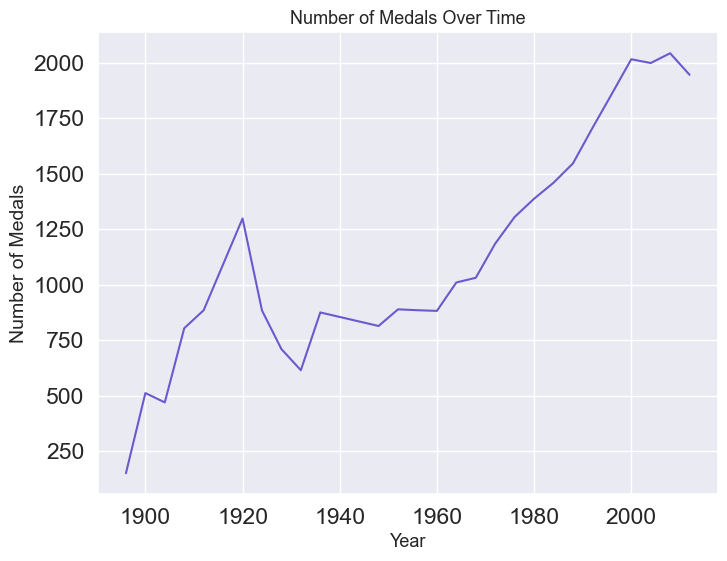

In [45]:
medal_counts = df.groupby('Year')['Medal'].count().reset_index()

plt.figure(figsize=(8, 6))
sns.lineplot(x='Year', y='Medal', data=medal_counts, color='SlateBlue')
plt.title("Number of Medals Over Time", fontsize=13)
plt.xlabel("Year", fontsize=13)
plt.ylabel("Number of Medals", fontsize=14)
plt.show()

In [46]:
df.Country.value_counts()

Country
USA    4585
URS    2049
GBR    1720
FRA    1396
GER    1305
       ... 
CIV       1
BDI       1
SEN       1
DJI       1
GAB       1
Name: count, Length: 147, dtype: int64

In [96]:
top10 = df['Country'].value_counts().head(10)
top10_gold_counts = df[df['Medal'] == 2]['Country'].value_counts().head(10)
top10_silver_counts = df[df['Medal'] == 1]['Country'].value_counts().head(10)
top10_bronze_counts = df[df['Medal'] == 0]['Country'].value_counts().head(10)


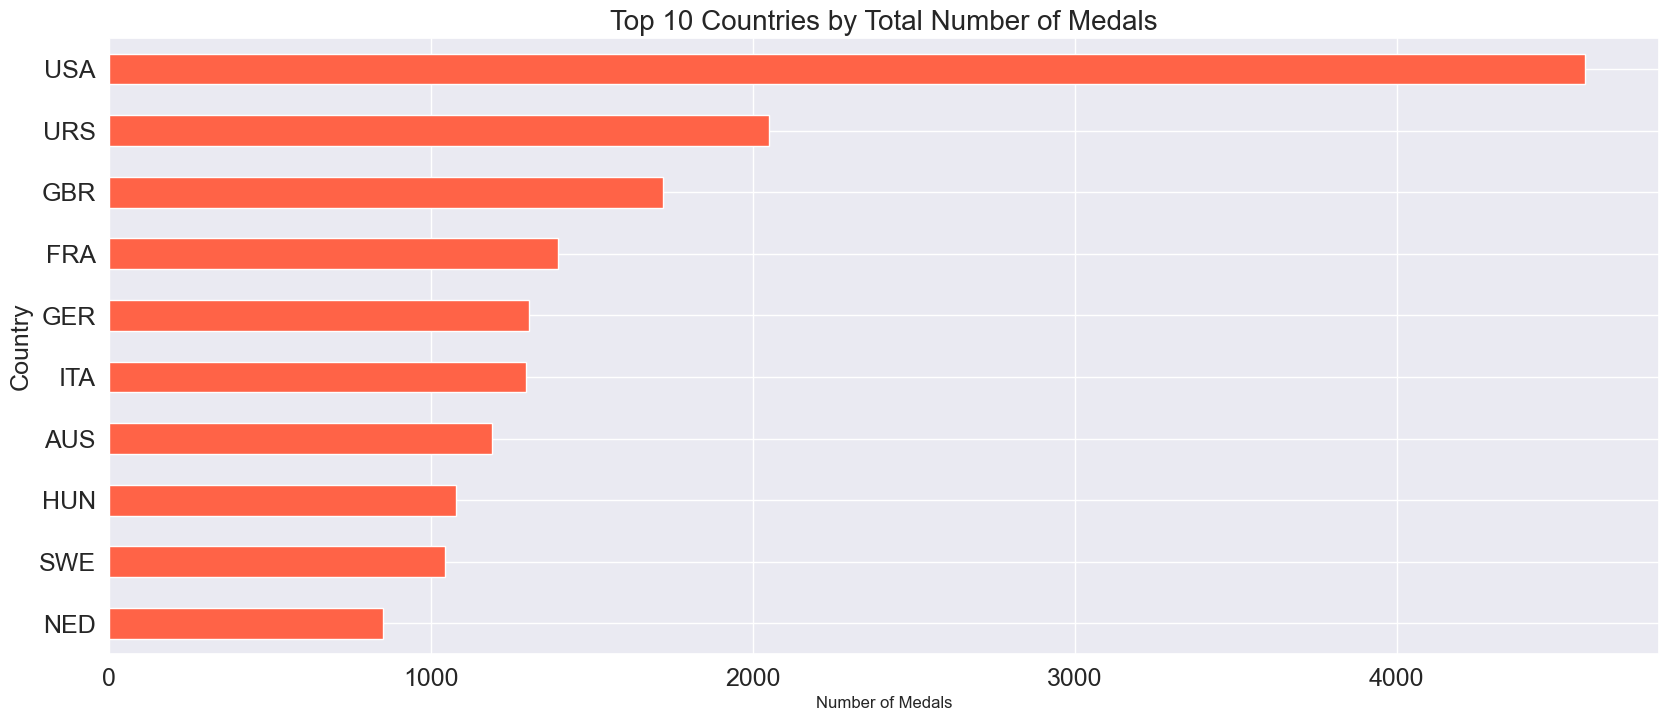

In [97]:
#Top 10 Countries by Total Number of Medals
top10.plot(kind="barh", figsize = (20, 8), fontsize = 18, color= 'Tomato')
plt.title("Top 10 Countries by Total Number of Medals", fontsize = 20)
plt.xlabel("Number of Medals", fontsize = 12)
plt.gca().invert_yaxis()
plt.show()

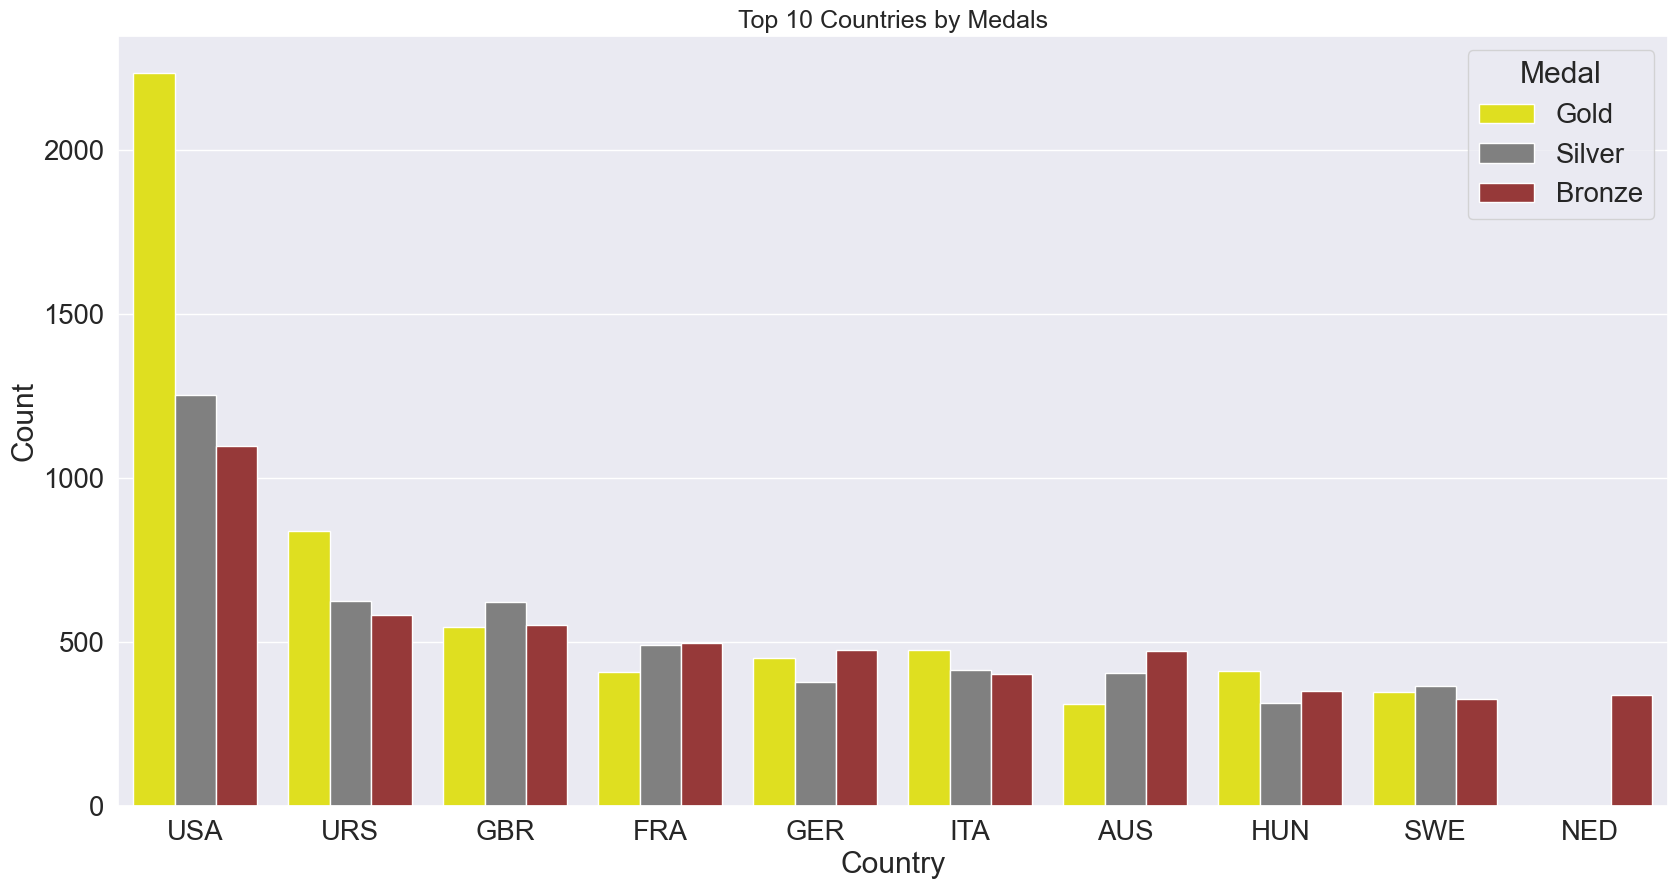

In [106]:
#Top 10 Countries by Medals
top10_df = pd.DataFrame({
    'Country': top10.index,
    'Gold': top10_gold_counts.reindex(top10.index, fill_value=0),
    'Silver': top10_silver_counts.reindex(top10.index, fill_value=0),
    'Bronze': top10_bronze_counts.reindex(top10.index, fill_value=0)
})
top10_df_melted = top10_df.melt('Country', var_name='Medal', value_name='Count')

plt.figure(figsize=(20, 10))
sns.set(font_scale=1.8)
sns.barplot(data=top10_df_melted, x='Country', y='Count', hue='Medal', order=top10_df['Country'],
            palette={"Gold": "yellow", "Silver": "grey", "Bronze": "brown"})
plt.title("Top 10 Countries by Medals", fontsize=18)
plt.show()

In [83]:
gender_counts = df['Gender'].value_counts()
print("Number of female athletes:", gender_counts['Women'])
print("Number of male athletes:", gender_counts['Men'])

Number of female athletes: 8417
Number of male athletes: 22744


In [84]:
gender_gold_counts = df[df['Medal'] == 2 ]['Gender'].value_counts()
gender_silver_counts = df[df['Medal'] == 1 ]['Gender'].value_counts()
gender_bronze_counts = df[df['Medal'] == 0 ]['Gender'].value_counts()
print("Number of Gold Medals by Women:", gender_gold_counts['Women'])
print("Number of Gold Medals by Men:", gender_gold_counts['Men'])
print("Number of Silver Medals by Women:", gender_silver_counts['Women'])
print("Number of Silver Medals by Men:", gender_silver_counts['Men'])
print("Number of Bronze Medals by Women:", gender_bronze_counts['Women'])
print("Number of Bronze Medals by Men:", gender_bronze_counts['Men'])

Number of Gold Medals by Women: 2786
Number of Gold Medals by Men: 7698
Number of Silver Medals by Women: 2801
Number of Silver Medals by Men: 7507
Number of Bronze Medals by Women: 2830
Number of Bronze Medals by Men: 7539


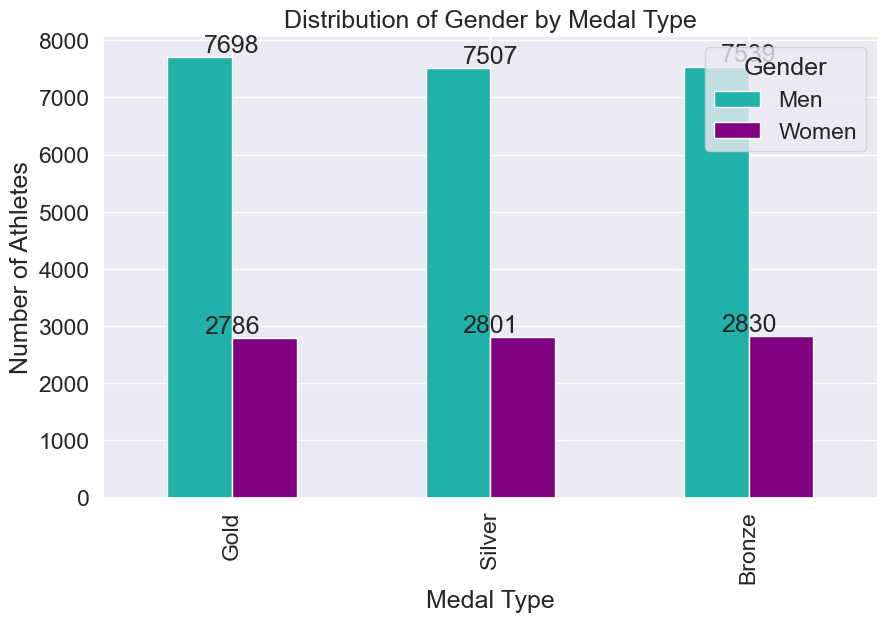

In [85]:
#Number of Gold Medals by Gender
gender_counts = pd.DataFrame({
    'Gold': gender_gold_counts,
    'Silver': gender_silver_counts,
    'Bronze': gender_bronze_counts
}).fillna(0)

gender_counts.T.plot(kind='bar', stacked=False, color=['LightSeaGreen', 'purple'], figsize=(10, 6))

for i, col in enumerate(gender_counts.columns):
    for j, value in enumerate(gender_counts[col]):
        plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

plt.title('Distribution of Gender by Medal Type')
plt.xlabel('Medal Type')
plt.ylabel('Number of Athletes')
plt.legend(title='Gender')
plt.show()

In [ ]:
#####  bu kod makine öğrenmesi kısmnıda ele alınacktır

##df['Country'] = label_encoder.fit_transform(df['Country'])
##one_hot_encoder = OneHotEncoder(sparse=False)
##encoded_countries = one_hot_encoder.fit_transform(df[['Country']])
##df_encoded = pd.concat([df, pd.DataFrame(encoded_countries, columns=['Country_'+str(int(i)) for i in range(encoded_countries.shape[1])])], axis=1)

In [ ]:
##print("Ülkeler ve Kodları:")
##for country, code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
 ##   print(f"{country}: {code}")